In [123]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [124]:
# Reading processed data
X_train = pd.read_pickle('/content/Processed/X_train.pkl')
X_test = pd.read_pickle('/content/Processed/X_test.pkl')
y_train = pd.read_pickle('/content/Processed/y_train.pkl')
y_test = pd.read_pickle('/content/Processed/y_test.pkl')

In [53]:
X_train.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Project ID,Project Name,Original Principal Amount,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
5192,2023-05-31,IBRD3822S,LATIN AMERICA AND CARIBBEAN,EC,Ecuador,Ministerio de Economia y Finanzas,EC,Ecuador,SCPD,Fully Repaid,4.36,P007136,ECUADOR MODERNIZATION OF THE STATE TA,9790385.62,2000-08-01,2015-02-01,1995-02-10,1994-12-13,1995-05-11,2001-03-31,NaT
774,2023-05-31,IBRD07340,LATIN AMERICA AND CARIBBEAN,AR,Argentina,JEFE DIVISION FINANCIACIONES,AR,Argentina,NPL,Fully Repaid,7.25,P005928,HIGHWAYS III,67500000.00,1975-05-01,1995-11-01,1971-05-05,1971-03-30,1971-09-03,1979-12-31,NaT
1529,2023-05-31,IBRD14050,WESTERN AND CENTRAL AFRICA,SN,Senegal,PORT AUTONOME DE DAKAR,SN,Senegal,NPL,Fully Repaid,8.20,P002299,DAKAR PORT II,6000000.00,1983-01-15,2001-01-15,1977-06-07,1977-04-19,1978-03-20,1985-03-29,NaT
3182,2023-05-31,IBRD26810,LATIN AMERICA AND CARIBBEAN,BR,Brazil,Ministério da Fazenda,BR,Brazil,CPL,Fully Repaid,5.01,P006367,SALVADOR METRO DEVT,55000000.00,1989-10-01,2001-04-01,1986-07-15,1986-04-22,1987-05-18,1997-06-30,1997-08-25
4057,2023-05-31,IBRD32210,LATIN AMERICA AND CARIBBEAN,UY,Uruguay,ADMINISTRACION NACIONAL DE USINAS,UY,Uruguay,CPL,Fully Repaid,5.59,P008146,POWER MODERNIZATION,18750000.00,1995-12-01,2005-06-01,1990-08-21,1990-06-07,1990-10-29,1999-06-30,1998-05-29


In [54]:
X_test.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Project ID,Project Name,Original Principal Amount,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
4569,2023-05-31,IBRD3499A,EUROPE AND CENTRAL ASIA,PL,Poland,MEMBERS OF THE COUNCIL OF MINISTERS,PL,Poland,SCL,Fully Repaid,1.36,P008590,HOUSING,1.599323e+07,1998-06-15,2009-06-15,1992-12-21,1992-06-25,1993-05-06,2000-06-30,2000-12-04
5011,2023-05-31,IBRD3732A,EAST ASIA AND PACIFIC,ID,Indonesia,Ministry of Finance,ID,Indonesia,SCL,Fully Repaid,0.00,P004020,KABUPATEN ROADS V,2.559432e+07,2000-01-15,2014-07-15,1994-06-08,1994-05-17,1994-08-29,1999-12-31,2000-06-30
3787,2023-05-31,IBRD30580,SOUTH ASIA,IN,India,CONTROLLER OF AID ACCOUNTS & AUDIT,IN,India,CPL,Fully Repaid,3.80,P009991,EXPORT DEVELOPMENT,1.200000e+08,1994-12-01,2009-06-01,1989-05-26,1989-05-12,1989-09-21,1996-03-31,1996-09-06
4270,2023-05-31,IBRD33400,EAST ASIA AND PACIFIC,ID,Indonesia,Ministry of Finance,ID,Indonesia,CPL,Fully Repaid,6.18,P003922,SULAWESI/IRIAN JAYA,3.720000e+06,1997-02-15,2011-08-15,1991-08-08,1991-06-06,1991-11-04,1999-03-31,1997-11-25
2424,2023-05-31,IBRD21220,SOUTH ASIA,PK,Pakistan,MINISTRY OF ECONOMIC AFFAIRS,PK,Pakistan,CPL,Fully Repaid,11.60,P010168,TELECOM IV,4.000000e+07,1987-09-15,2002-03-15,1982-04-14,1982-04-01,1982-06-09,1987-06-30,1987-07-24


In [55]:
y_train.head()

5192    0
774     0
1529    0
3182    0
4057    0
Name: bad, dtype: int64

In [56]:
y_test.head()

4569    0
5011    0
3787    0
4270    0
2424    0
Name: bad, dtype: int64

# Feature Engineering

In [57]:
X_train.shape, X_test.shape

((3887, 21), (1666, 21))

In [58]:
y_train.shape, y_test.shape

((3887,), (1666,))

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3887 entries, 5192 to 2991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   End of Period                 3887 non-null   datetime64[ns]
 1   Loan Number                   3887 non-null   object        
 2   Region                        3887 non-null   object        
 3   Country Code                  3887 non-null   object        
 4   Country                       3887 non-null   object        
 5   Borrower                      3849 non-null   object        
 6   Guarantor Country Code        3701 non-null   object        
 7   Guarantor                     3701 non-null   object        
 8   Loan Type                     3887 non-null   object        
 9   Loan Status                   3887 non-null   object        
 10  Interest Rate                 3887 non-null   float64       
 11  Project ID                 

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 4569 to 3538
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   End of Period                 1666 non-null   datetime64[ns]
 1   Loan Number                   1666 non-null   object        
 2   Region                        1666 non-null   object        
 3   Country Code                  1666 non-null   object        
 4   Country                       1666 non-null   object        
 5   Borrower                      1647 non-null   object        
 6   Guarantor Country Code        1575 non-null   object        
 7   Guarantor                     1575 non-null   object        
 8   Loan Type                     1666 non-null   object        
 9   Loan Status                   1666 non-null   object        
 10  Interest Rate                 1666 non-null   float64       
 11  Project ID                 

In [61]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 3887 entries, 5192 to 2991
Series name: bad
Non-Null Count  Dtype
--------------  -----
3887 non-null   int64
dtypes: int64(1)
memory usage: 60.7 KB


In [62]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 1666 entries, 4569 to 3538
Series name: bad
Non-Null Count  Dtype
--------------  -----
1666 non-null   int64
dtypes: int64(1)
memory usage: 26.0 KB


### 1. Removing unused features

In [63]:
def unused_feat_removal(df, feature_to_remove):
    df.drop(columns = feature_to_remove, inplace = True)
    return df

feature_to_remove = ["End of Period", "Loan Number", "Country Code", "Borrower", "Guarantor Country Code", "Loan Status", "Interest Rate", "Project ID", "Project Name", "First Repayment Date", "Last Repayment Date", "Agreement Signing Date",
                    "Board Approval Date", "Effective Date (Most Recent)", "Closed Date (Most Recent)", "Last Disbursement Date"]

unused_feat_removal(X_train, feature_to_remove)
unused_feat_removal(X_test, feature_to_remove)
X_train.shape, X_test.shape

((3887, 5), (1666, 5))

In [64]:
X_train.head()

,Region,Country,Guarantor,Loan Type,Original Principal Amount
5192,LATIN AMERICA AND CARIBBEAN,Ecuador,Ecuador,SCPD,9790385.62
774,LATIN AMERICA AND CARIBBEAN,Argentina,Argentina,NPL,67500000.00
1529,WESTERN AND CENTRAL AFRICA,Senegal,Senegal,NPL,6000000.00
3182,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,55000000.00
4057,LATIN AMERICA AND CARIBBEAN,Uruguay,Uruguay,CPL,18750000.00


In [65]:
X_test.head()

,Region,Country,Guarantor,Loan Type,Original Principal Amount
4569,EUROPE AND CENTRAL ASIA,Poland,Poland,SCL,1.599323e+07
5011,EAST ASIA AND PACIFIC,Indonesia,Indonesia,SCL,2.559432e+07
3787,SOUTH ASIA,India,India,CPL,1.200000e+08
4270,EAST ASIA AND PACIFIC,Indonesia,Indonesia,CPL,3.720000e+06
2424,SOUTH ASIA,Pakistan,Pakistan,CPL,4.000000e+07


### 2. Renaming Features


In [66]:
def feature_rename(df, rename_dict):
    return df.rename(columns = rename_dict)

rename_dict = {"Region": "region",
               "Country": "country",
               "Guarantor": "guarantor",
               "Loan Type": "loan_type",
               "Original Principal Amount": "principal_amount"}

X_train = feature_rename(X_train, rename_dict)
X_test = feature_rename(X_test, rename_dict)
X_train.shape, X_test.shape

((3887, 5), (1666, 5))

In [67]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount
5192,LATIN AMERICA AND CARIBBEAN,Ecuador,Ecuador,SCPD,9790385.62
774,LATIN AMERICA AND CARIBBEAN,Argentina,Argentina,NPL,67500000.00
1529,WESTERN AND CENTRAL AFRICA,Senegal,Senegal,NPL,6000000.00
3182,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,55000000.00
4057,LATIN AMERICA AND CARIBBEAN,Uruguay,Uruguay,CPL,18750000.00


In [68]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount
4569,EUROPE AND CENTRAL ASIA,Poland,Poland,SCL,1.599323e+07
5011,EAST ASIA AND PACIFIC,Indonesia,Indonesia,SCL,2.559432e+07
3787,SOUTH ASIA,India,India,CPL,1.200000e+08
4270,EAST ASIA AND PACIFIC,Indonesia,Indonesia,CPL,3.720000e+06
2424,SOUTH ASIA,Pakistan,Pakistan,CPL,4.000000e+07


### 3. Guarantor Status Country Wise

In [69]:
def country_guarantor_status_generator(df):
    df["country_guarantor_status"] = df.apply(lambda row: "same" if row["country"] == row["guarantor"] else ("no_guarantor" if pd.isnull(row["guarantor"]) else "differ"), axis = 1)
    return df

X_train = country_guarantor_status_generator(X_train)
X_test = country_guarantor_status_generator(X_test)
X_train.shape, X_test.shape

((3887, 6), (1666, 6))

In [70]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
5192,LATIN AMERICA AND CARIBBEAN,Ecuador,Ecuador,SCPD,9790385.62,same
774,LATIN AMERICA AND CARIBBEAN,Argentina,Argentina,NPL,67500000.00,same
1529,WESTERN AND CENTRAL AFRICA,Senegal,Senegal,NPL,6000000.00,same
3182,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,55000000.00,same
4057,LATIN AMERICA AND CARIBBEAN,Uruguay,Uruguay,CPL,18750000.00,same


In [71]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
4569,EUROPE AND CENTRAL ASIA,Poland,Poland,SCL,1.599323e+07,same
5011,EAST ASIA AND PACIFIC,Indonesia,Indonesia,SCL,2.559432e+07,same
3787,SOUTH ASIA,India,India,CPL,1.200000e+08,same
4270,EAST ASIA AND PACIFIC,Indonesia,Indonesia,CPL,3.720000e+06,same
2424,SOUTH ASIA,Pakistan,Pakistan,CPL,4.000000e+07,same


### 4. Checking features

In [72]:
X_train.shape, X_test.shape

((3887, 6), (1666, 6))

In [73]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
5192,LATIN AMERICA AND CARIBBEAN,Ecuador,Ecuador,SCPD,9790385.62,same
774,LATIN AMERICA AND CARIBBEAN,Argentina,Argentina,NPL,67500000.00,same
1529,WESTERN AND CENTRAL AFRICA,Senegal,Senegal,NPL,6000000.00,same
3182,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,55000000.00,same
4057,LATIN AMERICA AND CARIBBEAN,Uruguay,Uruguay,CPL,18750000.00,same


In [74]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
4569,EUROPE AND CENTRAL ASIA,Poland,Poland,SCL,1.599323e+07,same
5011,EAST ASIA AND PACIFIC,Indonesia,Indonesia,SCL,2.559432e+07,same
3787,SOUTH ASIA,India,India,CPL,1.200000e+08,same
4270,EAST ASIA AND PACIFIC,Indonesia,Indonesia,CPL,3.720000e+06,same
2424,SOUTH ASIA,Pakistan,Pakistan,CPL,4.000000e+07,same


In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3887 entries, 5192 to 2991
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region                    3887 non-null   object 
 1   country                   3887 non-null   object 
 2   guarantor                 3701 non-null   object 
 3   loan_type                 3887 non-null   object 
 4   principal_amount          3887 non-null   float64
 5   country_guarantor_status  3887 non-null   object 
dtypes: float64(1), object(5)
memory usage: 212.6+ KB


In [76]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 4569 to 3538
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region                    1666 non-null   object 
 1   country                   1666 non-null   object 
 2   guarantor                 1575 non-null   object 
 3   loan_type                 1666 non-null   object 
 4   principal_amount          1666 non-null   float64
 5   country_guarantor_status  1666 non-null   object 
dtypes: float64(1), object(5)
memory usage: 91.1+ KB


## Performing Feature Selection

### Feature Binning

#### 1. Checking Feature Weight of Evidence and Information Value

In [77]:
def woe_analysis(X, feature, y):
    df = pd.concat([X[feature], y], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns[0], "n_observation", "proportion_of_category"]
    df["proportion_of_observation"] = df["n_observation"] / df["n_observation"].sum()
    df["n_good"] = df["proportion_of_category"] * df["n_observation"]
    df["n_bad"] = (1 - df["proportion_of_category"]) * df["n_observation"]
    df["proportion_of_good"] = df["n_good"] / df["n_good"].sum()
    df["proportion_of_bad"] = df["n_bad"] / df["n_bad"].sum()
    df["WoE"] = np.log(df["proportion_of_good"] / df["proportion_of_bad"])
    df = df.sort_values(["WoE"]).reset_index(drop = True)
    df["diff_proportion_of_category"] = df["proportion_of_category"].diff().abs()
    df["diff_WoE"] = df["WoE"].diff().abs()
    df["IV"] = (df["proportion_of_good"] - df["proportion_of_bad"]) * df["WoE"]
    df["IV"] = df["IV"].sum()
    return df

def plot_by_woe(woe_df, rotation_of_x_axis_labels = 0):
    x = np.array(woe_df.iloc[:, 0].astype(str))
    y = woe_df["WoE"]
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(woe_df.columns[0])
    plt.ylabel("Weight of Evidence")
    plt.title("Weight of Evidence by " + woe_df.columns[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [78]:
X_binning = X_train.copy()
print(' Shape of X_binning', X_binning.shape, '\n')

X_binning.head()

 Shape of X_binning (3887, 6) 



,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
5192,LATIN AMERICA AND CARIBBEAN,Ecuador,Ecuador,SCPD,9790385.62,same
774,LATIN AMERICA AND CARIBBEAN,Argentina,Argentina,NPL,67500000.00,same
1529,WESTERN AND CENTRAL AFRICA,Senegal,Senegal,NPL,6000000.00,same
3182,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,55000000.00,same
4057,LATIN AMERICA AND CARIBBEAN,Uruguay,Uruguay,CPL,18750000.00,same


In [79]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
5192,LATIN AMERICA AND CARIBBEAN,Ecuador,Ecuador,SCPD,9790385.62,same
774,LATIN AMERICA AND CARIBBEAN,Argentina,Argentina,NPL,67500000.00,same
1529,WESTERN AND CENTRAL AFRICA,Senegal,Senegal,NPL,6000000.00,same
3182,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,55000000.00,same
4057,LATIN AMERICA AND CARIBBEAN,Uruguay,Uruguay,CPL,18750000.00,same


#### 1.A Region

In [80]:
region_woe = woe_analysis(X_binning, "region", y_train)
region_woe

,region,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,EASTERN AND SOUTHERN AFRICA,198,0.010101,0.050939,2.0,196.0,0.017699,0.051934,-1.076465,NaN,NaN,0.261771
1,WESTERN AND CENTRAL AFRICA,243,0.012346,0.062516,3.0,240.0,0.026549,0.063593,-0.873524,0.002245,0.202941,0.261771
2,LATIN AMERICA AND CARIBBEAN,1189,0.020185,0.305891,24.0,1165.0,0.212389,0.308691,-0.373920,0.007839,0.499604,0.261771
3,EAST ASIA AND PACIFIC,919,0.022851,0.236429,21.0,898.0,0.185841,0.237944,-0.247145,0.002666,0.126775,0.261771
4,MIDDLE EAST AND NORTH AFRICA,465,0.034409,0.119630,16.0,449.0,0.141593,0.118972,0.174069,0.011558,0.421213,0.261771
5,EUROPE AND CENTRAL ASIA,652,0.047546,0.167739,31.0,621.0,0.274336,0.164547,0.511159,0.013137,0.337090,0.261771
6,SOUTH ASIA,221,0.072398,0.056856,16.0,205.0,0.141593,0.054319,0.958082,0.024852,0.446923,0.261771


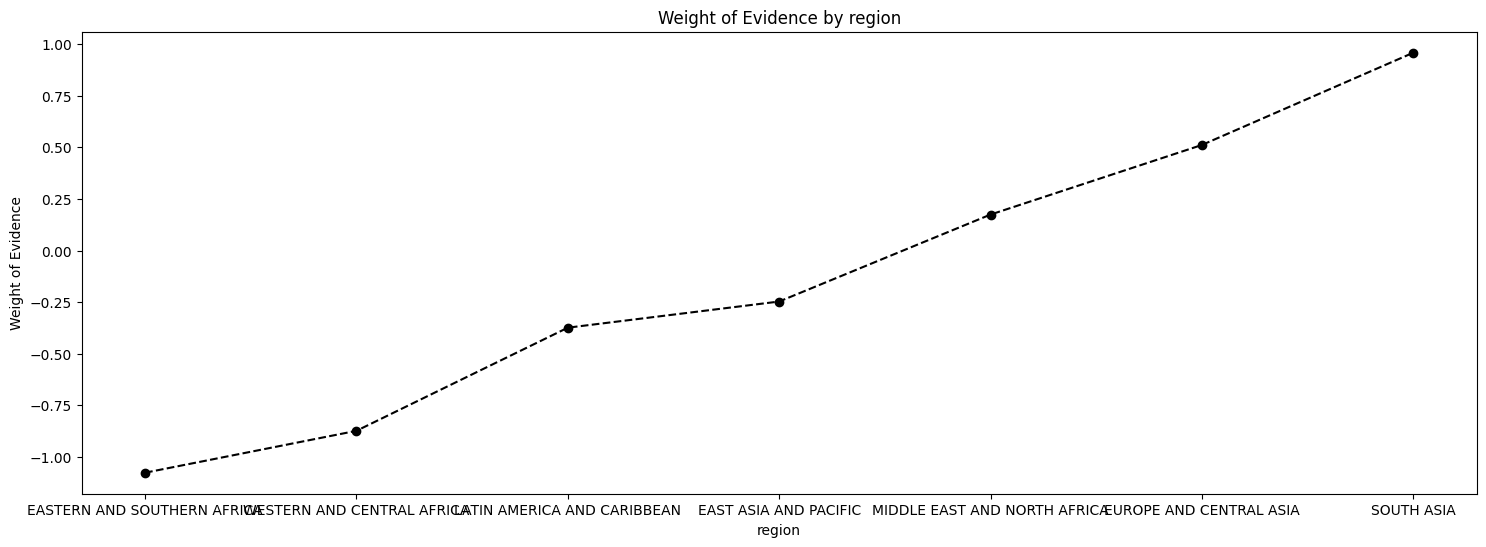

In [81]:
plot_by_woe(region_woe)

In [82]:
regions_bin = {"EAST ASIA AND PACIFIC": "EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PACIFIC",
               "EASTERN AND SOUTHERN AFRICA": "EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PACIFIC",
               "EUROPE AND CENTRAL ASIA": "EUROPE AND CENTRAL ASIA & SOUTH ASIA",
               "SOUTH ASIA": "EUROPE AND CENTRAL ASIA & SOUTH ASIA"}

def region_binning(df):
    df["region"] = df["region"].replace(regions_bin)
    return df

X_binning = region_binning(X_binning)
X_binning.shape

(3887, 6)

In [83]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
5192,LATIN AMERICA AND CARIBBEAN,Ecuador,Ecuador,SCPD,9790385.62,same
774,LATIN AMERICA AND CARIBBEAN,Argentina,Argentina,NPL,67500000.00,same
1529,WESTERN AND CENTRAL AFRICA,Senegal,Senegal,NPL,6000000.00,same
3182,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,55000000.00,same
4057,LATIN AMERICA AND CARIBBEAN,Uruguay,Uruguay,CPL,18750000.00,same


In [84]:
region_woe = woe_analysis(X_binning, "region", y_train)
region_woe

,region,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,WESTERN AND CENTRAL AFRICA,243,0.012346,0.062516,3.0,240.0,0.026549,0.063593,-0.873524,NaN,NaN,0.229361
1,LATIN AMERICA AND CARIBBEAN,1189,0.020185,0.305891,24.0,1165.0,0.212389,0.308691,-0.373920,0.007839,0.499604,0.229361
2,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,1117,0.020591,0.287368,23.0,1094.0,0.203540,0.289878,-0.353599,0.000406,0.020321,0.229361
3,MIDDLE EAST AND NORTH AFRICA,465,0.034409,0.119630,16.0,449.0,0.141593,0.118972,0.174069,0.013818,0.527668,0.229361
4,EUROPE AND CENTRAL ASIA & SOUTH ASIA,873,0.053837,0.224595,47.0,826.0,0.415929,0.218866,0.642056,0.019429,0.467987,0.229361


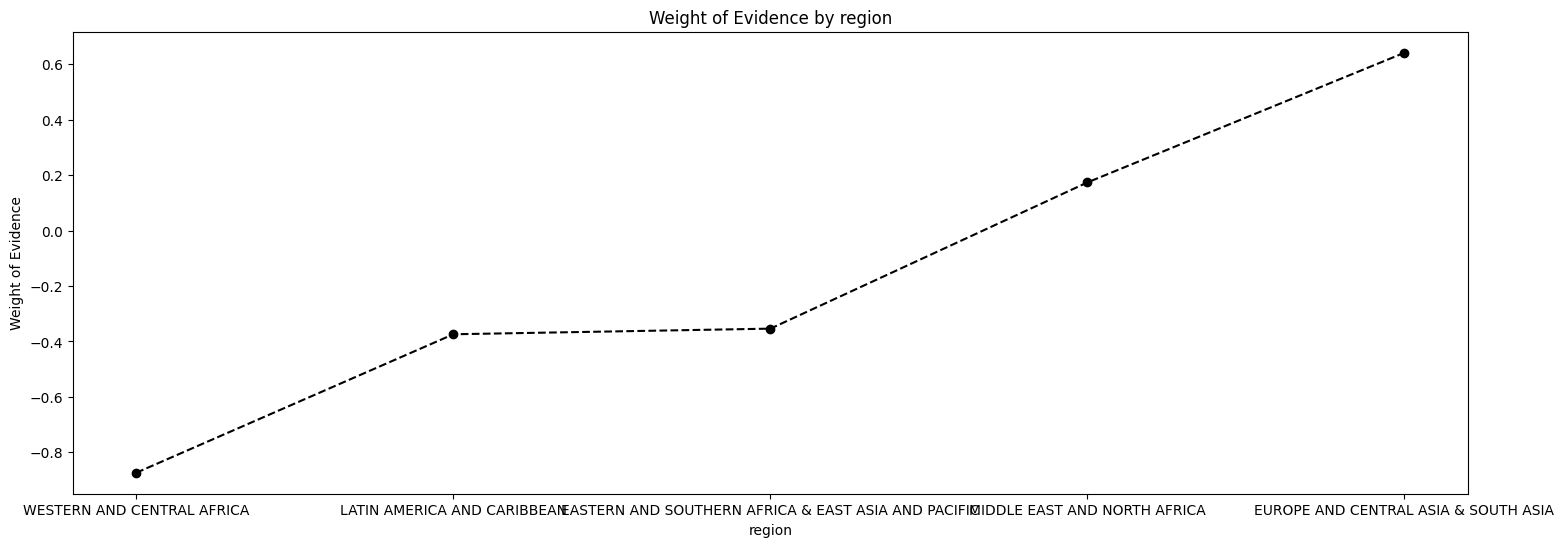

In [85]:
plot_by_woe(region_woe)

#### 1.B Country

In [86]:
country_woe = woe_analysis(X_binning, "country", y_train)
country_woe

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,Latvia,5,0.000000,0.001286,0.0,5.0,0.000000,0.001325,-inf,NaN,NaN,inf
1,Oman,9,0.000000,0.002315,0.0,9.0,0.000000,0.002385,-inf,0.000000,NaN,inf
2,Norway,3,0.000000,0.000772,0.0,3.0,0.000000,0.000795,-inf,0.000000,NaN,inf
3,North Macedonia,22,0.000000,0.005660,0.0,22.0,0.000000,0.005829,-inf,0.000000,NaN,inf
4,Nigeria,52,0.000000,0.013378,0.0,52.0,0.000000,0.013778,-inf,0.000000,NaN,inf
5,Nicaragua,20,0.000000,0.005145,0.0,20.0,0.000000,0.005299,-inf,0.000000,NaN,inf
6,Netherlands,7,0.000000,0.001801,0.0,7.0,0.000000,0.001855,-inf,0.000000,NaN,inf
7,Myanmar,3,0.000000,0.000772,0.0,3.0,0.000000,0.000795,-inf,0.000000,NaN,inf
8,Mauritius,39,0.000000,0.010033,0.0,39.0,0.000000,0.010334,-inf,0.000000,NaN,inf
9,Mauritania,1,0.000000,0.000257,0.0,1.0,0.000000,0.000265,-inf,0.000000,NaN,inf


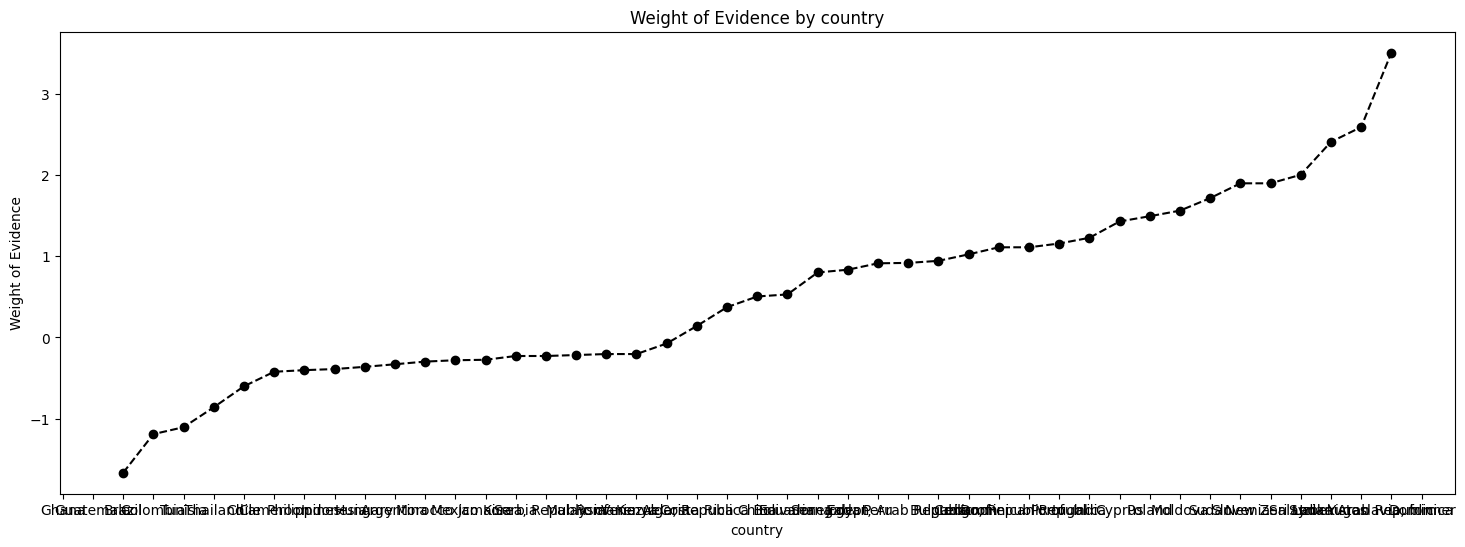

In [87]:
plot_by_woe(country_woe)

In [88]:
country_groups = [["Zimbabwe", "Papua New Guinea", "Honduras", "Haiti", "Guyana", "Romania", "Senegal", "Grenada", "Greece", "Ghana", "Gabon", "France", "Finland", "Fiji", "Ethiopia", "Seychelles", "Iceland", "Oman", "Iran, Islamic Republic of", "Iraq",
                   "Mauritania", "Myanmar", "Malawi", "Madagascar", "Namibia", "Liberia", "Lesotho", "Mauritius", "Netherlands", "Zambia", "Nigeria", "Norway", "Japan", "Italy", "Israel", "Ireland", "Nicaragua", "Sierra Leone", "Estonia", "Slovak Republic",
                   "Botswana", "Bosnia and Herzegovina", "Bolivia", "Belize", "Belgium", "Belarus", "Barbados", "Bangladesh", "Bahamas, The", "Austria", "Australia", "Armenia", "Turkmenistan", "Uganda", "Western and Central Africa", "Singapore", "Burundi",
                   "Bulgaria", "Montenegro", "Spain", "St. Kitts and Nevis", "Cote d'Ivoire", "Trinidad and Tobago", "St. Lucia", "Congo, Republic of", "Czechia", "Congo, Democratic Republic of", "Southern Africa", "Taiwan, China", "Tanzania", "Chad",
                   "South Africa", "Eastern and Southern Africa", "St. Vincent and the Grenadines", "Denmark", "Turkiye", "Korea, Republic of"],
                  ["Tunisia", "Jamaica", "Indonesia"],
                  ["Thailand", "Kenya", "Cameroon", "Brazil"],
                  ["Colombia", "Philippines"],
                  ["Morocco", "Malaysia", "Costa Rica", "North Macedonia"],
                  ["China", "Algeria", "Hungary"],
                  ["Serbia", "Croatia", "Venezuela, Republica Bolivariana de", "Uruguay", "Chile"],
                  ["Argentina", "Portugal", "Panama", "Slovenia", "Poland"],
                  ["Mexico", "Russian Federation", "Kazakhstan", "Latvia", "Peru", "Lithuania"],
                  ["Dominican Republic", "Cyprus", "Pakistan", "Eswatini", "India", "Uzbekistan", "Egypt, Arab Republic of", "Ecuador", "Guatemala"],
                  ["Paraguay", "Jordan", "El Salvador", "Sudan", "Caribbean", "Ukraine", "Syrian Arab Republic", "Lebanon", "New Zealand", "Sri Lanka", "Moldova", "Dominica", "Azerbaijan", "Yugoslavia, former", "Guinea", "Vietnam", "Mozambique", "Angola",
                   "Albania"]]

def country_binning(df, groups):
    for i, group in enumerate(groups):
        for country in group:
            df.loc[df["country"] == country, "country"] = f'group_{chr(97+i)}'
    remaining_countries = set(df["country"]) - set([f'group_{chr(97+i)}' for i in range(len(groups))])
    last_group_name = f'group_{chr(97+len(groups)-1)}'
    for country in remaining_countries:
        df.loc[df["country"] == country, "country"] = last_group_name
    return df

X_binning = country_binning(X_binning, country_groups)
X_binning.shape


(3887, 6)

In [89]:
country_woe = woe_analysis(X_binning, "country", y_train)
country_woe

,country,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,group_a,995,0.006030,0.255981,6.0,989.0,0.053097,0.262056,-1.596432,NaN,NaN,0.917451
1,group_c,352,0.011364,0.090558,4.0,348.0,0.035398,0.092210,-0.957405,0.005333,0.639027,0.917451
2,group_d,264,0.015152,0.067919,4.0,260.0,0.035398,0.068892,-0.665884,0.003788,0.291521,0.917451
3,group_b,449,0.017817,0.115513,8.0,441.0,0.070796,0.116852,-0.501100,0.002666,0.164784,0.917451
4,group_g,212,0.018868,0.054541,4.0,208.0,0.035398,0.055114,-0.442741,0.001051,0.058360,0.917451
5,group_e,275,0.021818,0.070749,6.0,269.0,0.053097,0.071277,-0.294449,0.002950,0.148292,0.917451
6,group_i,310,0.029032,0.079753,9.0,301.0,0.079646,0.079756,-0.001383,0.007214,0.293066,0.917451
7,group_f,250,0.036000,0.064317,9.0,241.0,0.079646,0.063858,0.220931,0.006968,0.222313,0.917451
8,group_h,197,0.055838,0.050682,11.0,186.0,0.097345,0.049285,0.680652,0.019838,0.459721,0.917451
9,group_j,401,0.064838,0.103164,26.0,375.0,0.230088,0.099364,0.839673,0.009000,0.159022,0.917451


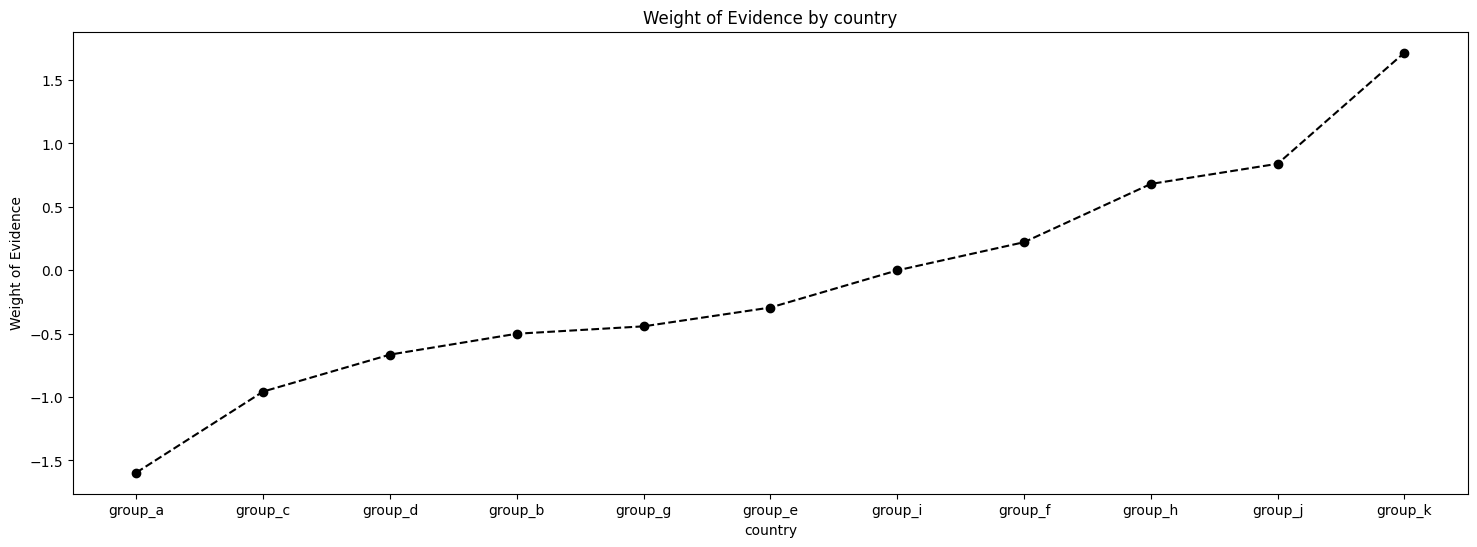

In [90]:
plot_by_woe(country_woe)

##### 1.C Guarantor

In [91]:
guarantor_woe = woe_analysis(X_binning, "guarantor", y_train)
guarantor_woe

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,guarantor,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,Lesotho,1,0.000000,0.000270,0.0,1.0,0.000000,0.000277,-inf,NaN,NaN,inf
1,Panama,27,0.000000,0.007295,0.0,27.0,0.000000,0.007492,-inf,0.000000,NaN,inf
2,Pakistan,59,0.000000,0.015942,0.0,59.0,0.000000,0.016371,-inf,0.000000,NaN,inf
3,North Macedonia,22,0.000000,0.005944,0.0,22.0,0.000000,0.006104,-inf,0.000000,NaN,inf
4,Nigeria,52,0.000000,0.014050,0.0,52.0,0.000000,0.014428,-inf,0.000000,NaN,inf
5,Nicaragua,20,0.000000,0.005404,0.0,20.0,0.000000,0.005549,-inf,0.000000,NaN,inf
6,Myanmar,3,0.000000,0.000811,0.0,3.0,0.000000,0.000832,-inf,0.000000,NaN,inf
7,Mauritius,38,0.000000,0.010267,0.0,38.0,0.000000,0.010544,-inf,0.000000,NaN,inf
8,Papua New Guinea,17,0.000000,0.004593,0.0,17.0,0.000000,0.004717,-inf,0.000000,NaN,inf
9,Mauritania,1,0.000000,0.000270,0.0,1.0,0.000000,0.000277,-inf,0.000000,NaN,inf


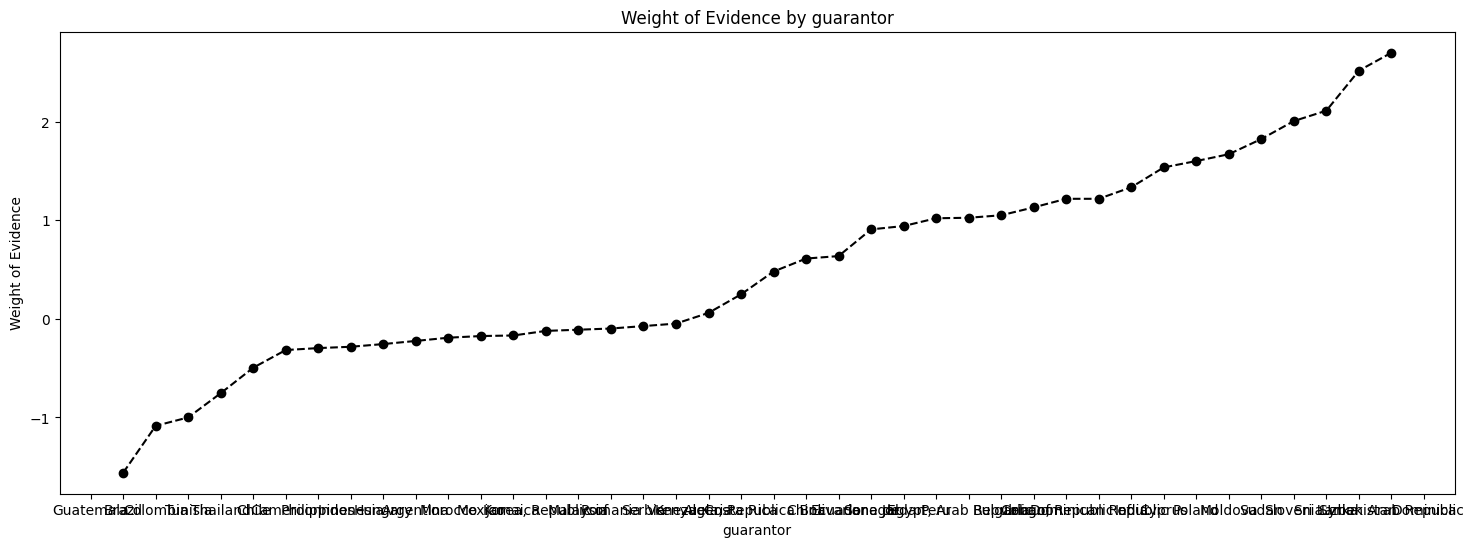

In [92]:
plot_by_woe(guarantor_woe)

In [93]:
guarantor_groups = [["Zambia", "France", "Gabon", "Ghana", "Grenada", "Tanzania", "Guyana", "Haiti", "Honduras", "St. Vincent and the Grenadines", "Iran, Islamic Republic of", "Iraq", "St. Lucia", "Western and Central Africa", "St. Kitts and Nevis", "Lesotho",
                     "Liberia", "South Africa", "Romania", "Seychelles", "Papua New Guinea", "Sierra Leone", "Nigeria", "Nicaragua", "Fiji", "Namibia", "Slovak Republic", "Montenegro", "Mauritius", "Mauritania", "Malawi", "Madagascar", "Myanmar", "Ethiopia",
                     "Taiwan, China", "Senegal", "Chad", "Botswana", "Bosnia and Herzegovina", "Bolivia", "Belize", "Belgium", "Congo, Democratic Republic of", "Congo, Republic of", "Bulgaria", "Bangladesh", "Belarus", "Australia", "Armenia", "United Kingdom",
                     "Czechia", "Uganda", "Turkmenistan", "Trinidad and Tobago", "Cote d'Ivoire", "Estonia", "Turkiye", "Korea, Republic of"],
                    ["Tunisia", "Jamaica", "Indonesia"],
                    ["Thailand", "Cameroon", "Kenya", "Brazil"],
                    ["Philippines", "Colombia"],
                    ["Morocco", "Malaysia", "Costa Rica", "North Macedonia"],
                    ["China", "Algeria", "Hungary", "Serbia"],
                    ["Croatia", "Venezuela, Republica Bolivariana de", "Uruguay", "Chile", "Caribbean", "Argentina"],
                    ["Panama", "Slovenia", "Poland", "Mexico", "Russian Federation", "Kazakhstan", "Latvia", "Peru", "Lithuania"],
                    ["Dominican Republic", "Cyprus", "Pakistan", "India", "Uzbekistan", "Egypt, Arab Republic of", "Ecuador", "Eswatini"],
                    ["Guatemala", "Paraguay", "Jordan", "El Salvador", "Sudan", "Ukraine", "Syrian Arab Republic", "Lebanon", "Sri Lanka", "Moldova", "Dominica", "Azerbaijan", "Mozambique", "Angola", "Vietnam", "Guinea", "Albania"]]

In [94]:
def guarantor_binning(df, groups):
    for i, group in enumerate(groups):
        for guarantor in group:
            df.loc[df["guarantor"] == guarantor, "guarantor"] = f'group_{chr(97+i)}'
    remaining_guarantors = set(df["guarantor"]) - set([f'group_{chr(97+i)}' for i in range(len(groups))])
    last_group_name = f'group_{chr(97+len(groups)-1)}'
    for guarantor in remaining_guarantors:
        df.loc[df["guarantor"] == guarantor, "guarantor"] = last_group_name
    df["guarantor"] = df["guarantor"].fillna(last_group_name)
    return df

X_binning = guarantor_binning(X_binning, guarantor_groups)
X_binning.shape

(3887, 6)

In [95]:
guarantor_woe = woe_analysis(X_binning, "guarantor", y_train)
guarantor_woe

,guarantor,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,group_a,856,0.007009,0.220221,6.0,850.0,0.053097,0.225225,-1.444974,NaN,NaN,0.681381
1,group_c,350,0.011429,0.090044,4.0,346.0,0.035398,0.091680,-0.951642,0.004419,0.493332,0.681381
2,group_d,264,0.015152,0.067919,4.0,260.0,0.035398,0.068892,-0.665884,0.003723,0.285757,0.681381
3,group_g,285,0.017544,0.073321,5.0,280.0,0.044248,0.074192,-0.516849,0.002392,0.149036,0.681381
4,group_b,449,0.017817,0.115513,8.0,441.0,0.070796,0.116852,-0.501100,0.000274,0.015748,0.681381
5,group_e,275,0.021818,0.070749,6.0,269.0,0.053097,0.071277,-0.294449,0.004001,0.206651,0.681381
6,group_f,289,0.034602,0.074350,10.0,279.0,0.088496,0.073927,0.179876,0.012784,0.474325,0.681381
7,group_h,389,0.041131,0.100077,16.0,373.0,0.141593,0.098834,0.359513,0.006529,0.179637,0.681381
8,group_i,376,0.069149,0.096733,26.0,350.0,0.230088,0.092740,0.908666,0.028018,0.549153,0.681381
9,group_j,354,0.079096,0.091073,28.0,326.0,0.247788,0.086380,1.053810,0.009947,0.145144,0.681381


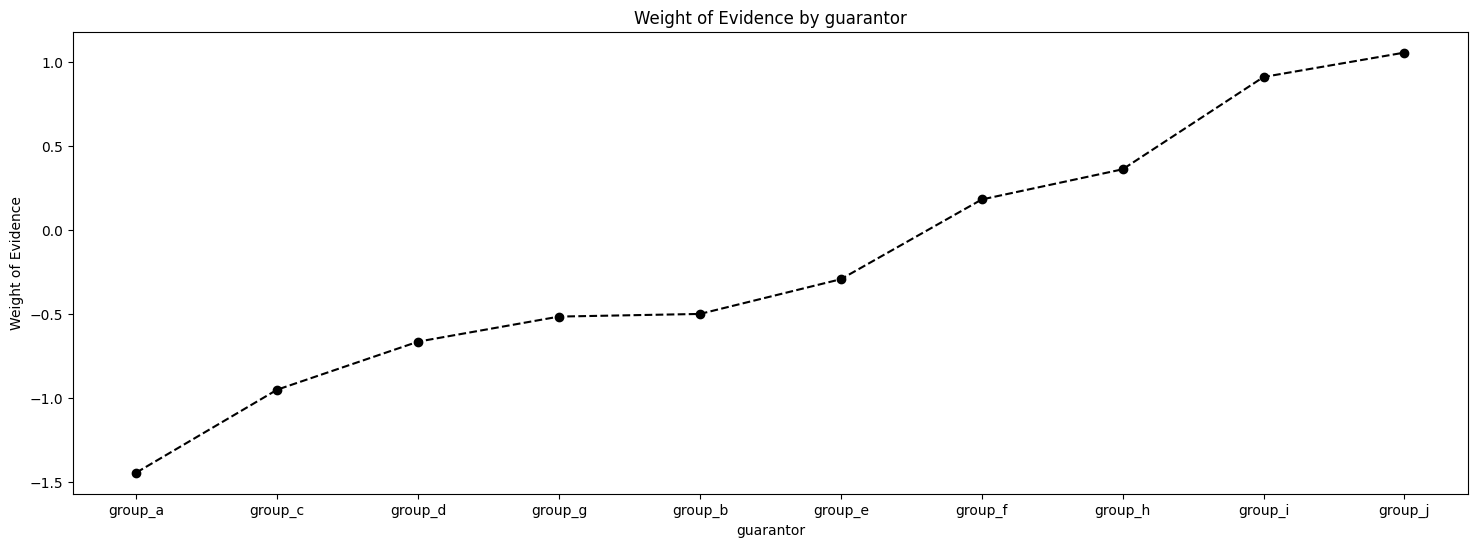

In [96]:
plot_by_woe(guarantor_woe)

#### 1.D Loan Type

In [97]:
loan_type_woe = woe_analysis(X_binning, "loan_type", y_train)
loan_type_woe

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,loan_type,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,SCPD,487,0.000000,0.125289,0.0,487.0,0.000000,0.129041,-inf,NaN,NaN,inf
1,SCPM,115,0.000000,0.029586,0.0,115.0,0.000000,0.030472,-inf,0.000000,NaN,inf
2,SCPY,11,0.000000,0.002830,0.0,11.0,0.000000,0.002915,-inf,0.000000,NaN,inf
3,NPL,1401,0.021413,0.360432,30.0,1371.0,0.265487,0.363275,-0.313595,0.021413,inf,inf
4,CPL,1468,0.042234,0.377669,62.0,1406.0,0.548673,0.372549,0.387133,0.020821,0.700729,inf
5,SCL,405,0.051852,0.104193,21.0,384.0,0.185841,0.101749,0.602383,0.009618,0.215250,inf


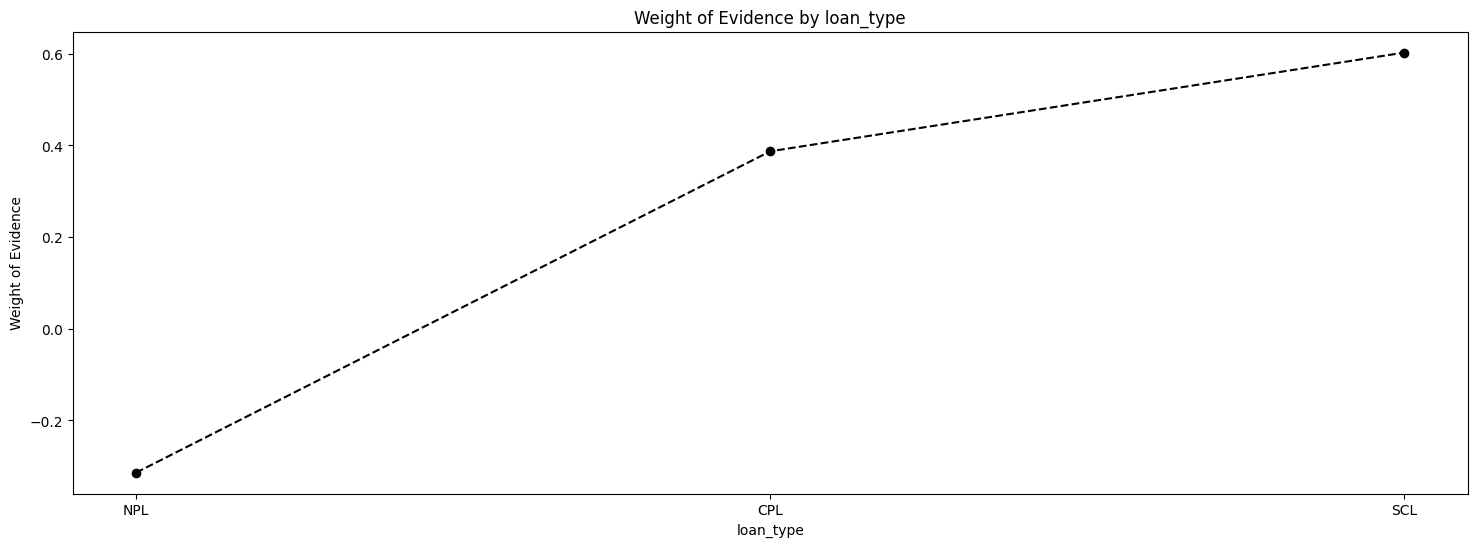

In [98]:
plot_by_woe(loan_type_woe)

In [99]:
loan_type_groups = [["BLNR", "SCPD", "SCPM", "SCPY", "NPL"],
                    ["SCL"],
                    ["CPL"],
                    ["FSL", "BLNC", "GUBF", "GURB"]]

def loan_type_binning(df, groups):
    for i, group in enumerate(groups):
        for loan_type in group:
            df.loc[df["loan_type"] == loan_type, "loan_type"] = f'group_{chr(97+i)}'
    remaining_loan_types = set(df["loan_type"]) - set([f'group_{chr(97+i)}' for i in range(len(groups))])
    return df

X_binning = loan_type_binning(X_binning, loan_type_groups)
X_binning.shape

(3887, 6)

In [100]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
5192,LATIN AMERICA AND CARIBBEAN,group_j,group_i,group_a,9790385.62,same
774,LATIN AMERICA AND CARIBBEAN,group_h,group_g,group_a,67500000.00,same
1529,WESTERN AND CENTRAL AFRICA,group_a,group_a,group_a,6000000.00,same
3182,LATIN AMERICA AND CARIBBEAN,group_c,group_c,group_c,55000000.00,same
4057,LATIN AMERICA AND CARIBBEAN,group_g,group_g,group_c,18750000.00,same


In [101]:
loan_type_woe = woe_analysis(X_binning, "loan_type", y_train)
loan_type_woe

,loan_type,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,group_a,2014,0.014896,0.518137,30.0,1984.0,0.265487,0.525702,-0.683170,NaN,NaN,0.29661
1,group_c,1468,0.042234,0.377669,62.0,1406.0,0.548673,0.372549,0.387133,0.027339,1.070303,0.29661
2,group_b,405,0.051852,0.104193,21.0,384.0,0.185841,0.101749,0.602383,0.009618,0.215250,0.29661


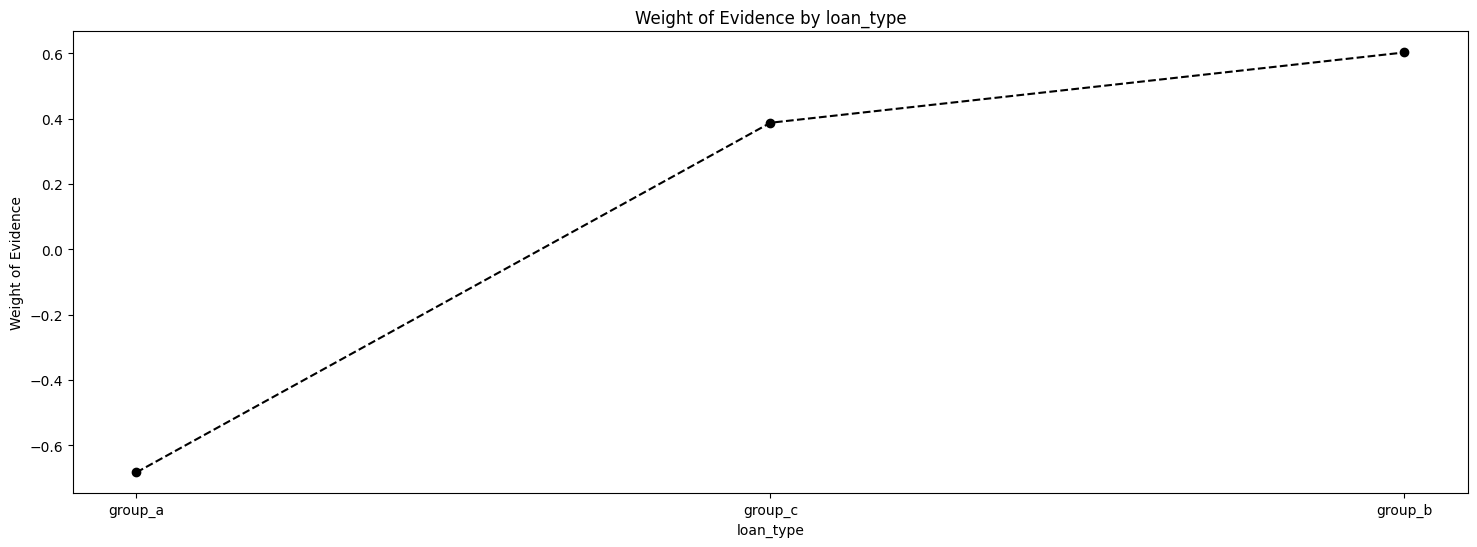

In [102]:
plot_by_woe(loan_type_woe)

#### 1.E Principal Amount

In [103]:
X_binning["principal_amount_binned"] = pd.cut(X_binning["principal_amount"], 5)
principal_amount_woe = woe_analysis(X_binning, "principal_amount", y_train)
principal_amount_woe

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,principal_amount,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,2.429091e+07,1,0.000000,0.000257,0.0,1.0,0.000000,0.000265,-inf,NaN,NaN,inf
1,4.717565e+07,1,0.000000,0.000257,0.0,1.0,0.000000,0.000265,-inf,0.000000,NaN,inf
2,4.716000e+07,1,0.000000,0.000257,0.0,1.0,0.000000,0.000265,-inf,0.000000,NaN,inf
3,4.700000e+07,3,0.000000,0.000772,0.0,3.0,0.000000,0.000795,-inf,0.000000,NaN,inf
4,4.689573e+07,1,0.000000,0.000257,0.0,1.0,0.000000,0.000265,-inf,0.000000,NaN,inf
5,4.676539e+07,1,0.000000,0.000257,0.0,1.0,0.000000,0.000265,-inf,0.000000,NaN,inf
6,4.676536e+07,1,0.000000,0.000257,0.0,1.0,0.000000,0.000265,-inf,0.000000,NaN,inf
7,4.670228e+07,1,0.000000,0.000257,0.0,1.0,0.000000,0.000265,-inf,0.000000,NaN,inf
8,4.665000e+07,1,0.000000,0.000257,0.0,1.0,0.000000,0.000265,-inf,0.000000,NaN,inf
9,4.650000e+07,2,0.000000,0.000515,0.0,2.0,0.000000,0.000530,-inf,0.000000,NaN,inf


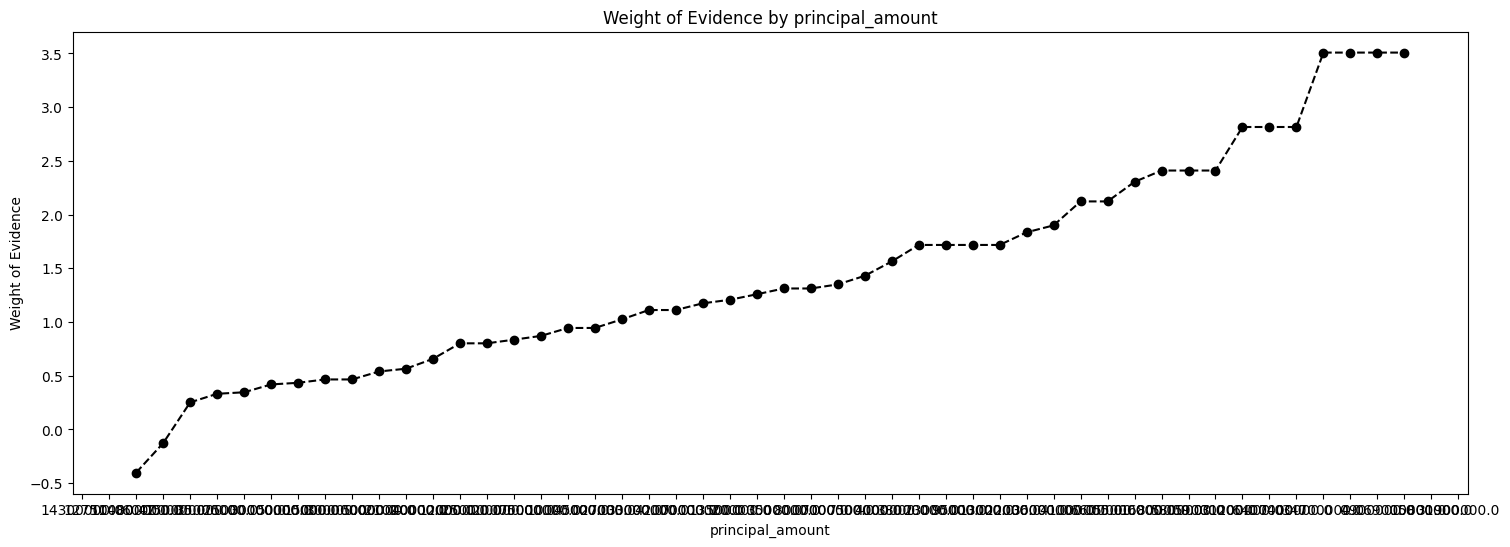

In [104]:
plot_by_woe(principal_amount_woe)

In [105]:
def principal_amount_binning(df):
    bins = [-np.inf, 1978840.31, 8013587.75, 23240000.00, 40215236.00, 54947816.00, 249441952.00, np.inf]
    bin_labels = ["-inf_to_1978840.31", "1978840.31_to_8013587.75", "8013587.75_to_23240000.00", "23240000.00_to_40215236.00", "40215236.00_to_54947816.00", "54947816.00_to_249441952.00", "249441952.00_to_inf"]
    df["principal_amount"] = pd.cut(df["principal_amount"], bins = bins, labels = bin_labels)
    df["principal_amount"] = df["principal_amount"].astype(str)
    return df

X_binning = principal_amount_binning(X_binning)
unused_feat_removal(X_binning, "principal_amount_binned")
X_binning.shape

(3887, 6)

In [106]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
5192,LATIN AMERICA AND CARIBBEAN,group_j,group_i,group_a,8013587.75_to_23240000.00,same
774,LATIN AMERICA AND CARIBBEAN,group_h,group_g,group_a,54947816.00_to_249441952.00,same
1529,WESTERN AND CENTRAL AFRICA,group_a,group_a,group_a,1978840.31_to_8013587.75,same
3182,LATIN AMERICA AND CARIBBEAN,group_c,group_c,group_c,54947816.00_to_249441952.00,same
4057,LATIN AMERICA AND CARIBBEAN,group_g,group_g,group_c,8013587.75_to_23240000.00,same


In [107]:
principal_amount_woe = woe_analysis(X_binning, "principal_amount", y_train)
principal_amount_woe

,principal_amount,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,54947816.00_to_249441952.00,973,0.018499,0.250322,18.0,955.0,0.159292,0.253047,-0.462837,NaN,NaN,0.172153
1,40215236.00_to_54947816.00,290,0.024138,0.074608,7.0,283.0,0.061947,0.074987,-0.191034,0.005638,0.271803,0.172153
2,23240000.00_to_40215236.00,671,0.028316,0.172627,19.0,652.0,0.168142,0.172761,-0.027103,0.004178,0.163931,0.172153
3,249441952.00_to_inf,141,0.028369,0.036275,4.0,137.0,0.035398,0.036301,-0.025184,0.000053,0.001919,0.172153
4,8013587.75_to_23240000.00,1013,0.028628,0.260612,29.0,984.0,0.256637,0.260731,-0.015827,0.000259,0.009356,0.172153
5,1978840.31_to_8013587.75,610,0.031148,0.156933,19.0,591.0,0.168142,0.156598,0.071126,0.002520,0.086953,0.172153
6,-inf_to_1978840.31,189,0.089947,0.048624,17.0,172.0,0.150442,0.045575,1.194222,0.058800,1.123096,0.172153


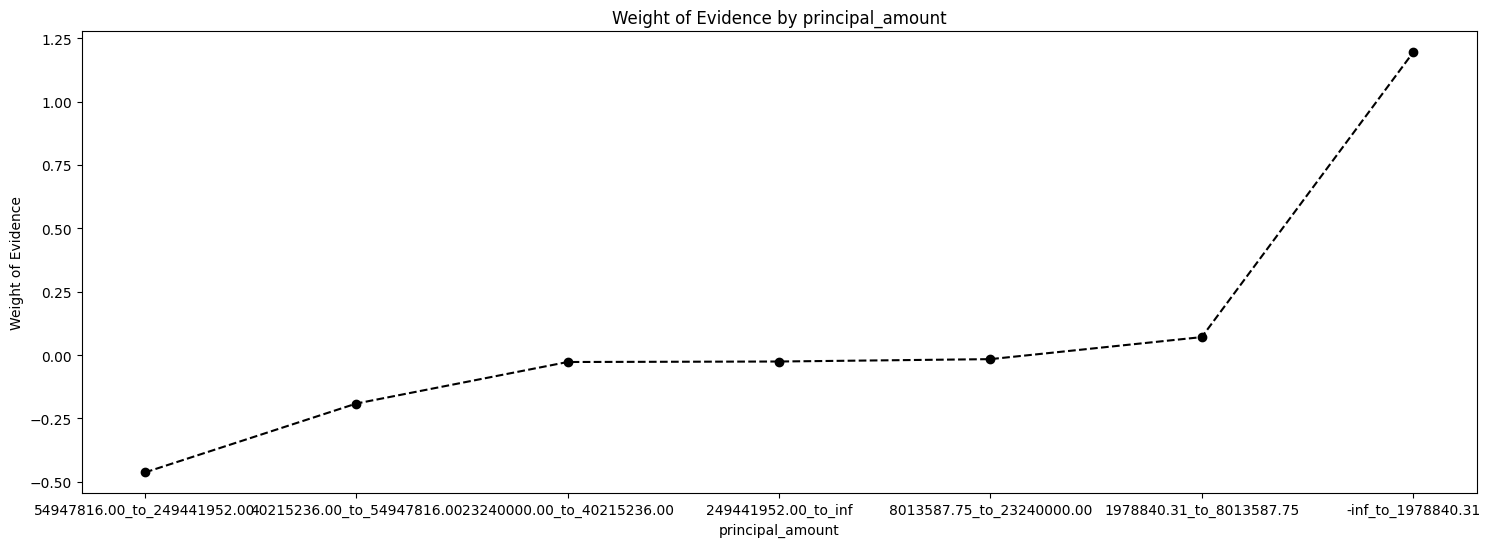

In [108]:
plot_by_woe(principal_amount_woe)

In [109]:
X_binning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3887 entries, 5192 to 2991
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   region                    3887 non-null   object
 1   country                   3887 non-null   object
 2   guarantor                 3887 non-null   object
 3   loan_type                 3887 non-null   object
 4   principal_amount          3887 non-null   object
 5   country_guarantor_status  3887 non-null   object
dtypes: object(6)
memory usage: 212.6+ KB


#### 1.F Guarantor Status - Country Wise

In [110]:
country_guarantor_status_woe = woe_analysis(X_binning, "country_guarantor_status", y_train)
country_guarantor_status_woe

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country_guarantor_status,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,differ,36,0.000000,0.009262,0.0,36.0,0.000000,0.009539,-inf,NaN,NaN,inf
1,same,3665,0.026467,0.942887,97.0,3568.0,0.858407,0.945416,-0.096547,0.026467,inf,inf
2,no_guarantor,186,0.086022,0.047852,16.0,170.0,0.141593,0.045045,1.145293,0.059555,1.24184,inf


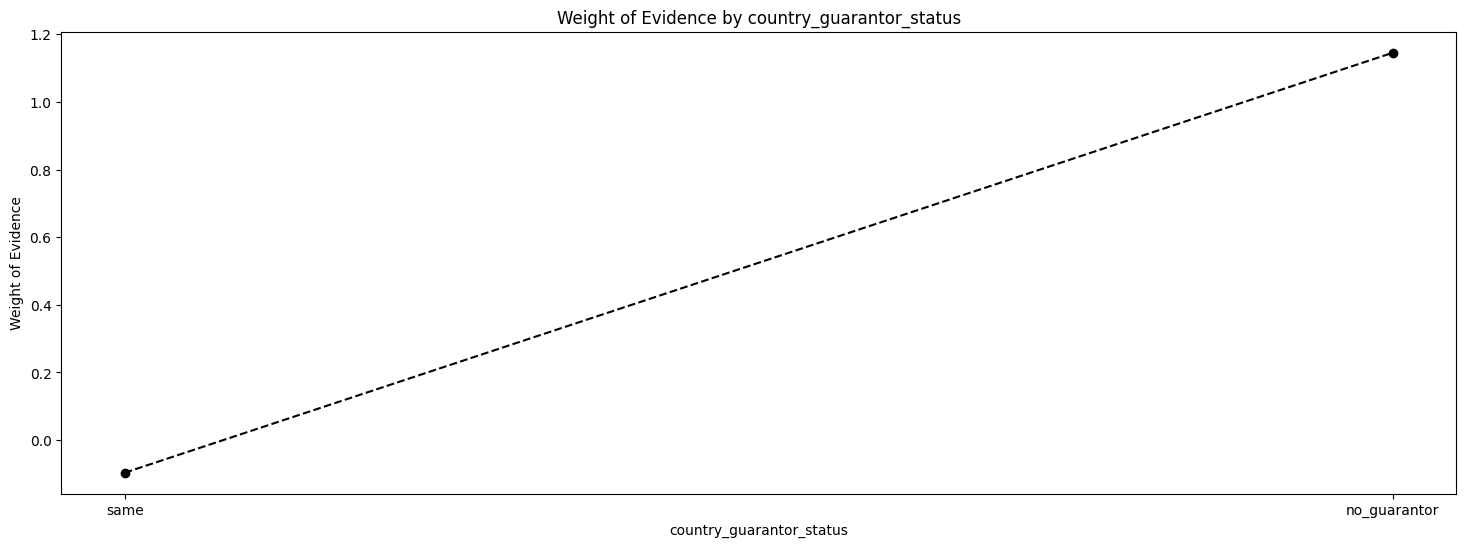

In [111]:
plot_by_woe(country_guarantor_status_woe)

### 2. Feature Binning One-Hot Encoding

In [113]:
X_train_binned = X_train.copy()
X_test_binned = X_test.copy()

def feature_binning(df):
    df = region_binning(df)
    df = country_binning(df, country_groups)
    df = guarantor_binning(df, guarantor_groups)
    df = loan_type_binning(df, loan_type_groups)
    df = principal_amount_binning(df)
    return df

X_train_binned = feature_binning(X_train_binned)
X_test_binned = feature_binning(X_test_binned)
X_train_binned.shape, X_test_binned.shape

((3887, 6), (1666, 6))

In [114]:
X_train_binned.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
5192,LATIN AMERICA AND CARIBBEAN,group_j,group_i,group_a,8013587.75_to_23240000.00,same
774,LATIN AMERICA AND CARIBBEAN,group_h,group_g,group_a,54947816.00_to_249441952.00,same
1529,WESTERN AND CENTRAL AFRICA,group_a,group_a,group_a,1978840.31_to_8013587.75,same
3182,LATIN AMERICA AND CARIBBEAN,group_c,group_c,group_c,54947816.00_to_249441952.00,same
4057,LATIN AMERICA AND CARIBBEAN,group_g,group_g,group_c,8013587.75_to_23240000.00,same


In [115]:
X_test_binned.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
4569,EUROPE AND CENTRAL ASIA & SOUTH ASIA,group_h,group_h,group_b,8013587.75_to_23240000.00,same
5011,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,group_b,group_b,group_b,23240000.00_to_40215236.00,same
3787,EUROPE AND CENTRAL ASIA & SOUTH ASIA,group_j,group_i,group_c,54947816.00_to_249441952.00,same
4270,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,group_b,group_b,group_c,1978840.31_to_8013587.75,same
2424,EUROPE AND CENTRAL ASIA & SOUTH ASIA,group_j,group_i,group_c,23240000.00_to_40215236.00,same


In [116]:
feature_to_encode = ["region", "country", "guarantor", "loan_type", "principal_amount", "country_guarantor_status"]

In [118]:
def one_hot_encoding(df, feature_to_encode):
    df_encoded = pd.get_dummies(df,
                                columns = feature_to_encode,
                                prefix = feature_to_encode,
                                prefix_sep = ":")
    df_encoded = df_encoded.astype(int)
    return df_encoded

X_train_ohe = one_hot_encoding(X_train_binned, feature_to_encode)
X_test_ohe = one_hot_encoding(X_test_binned, feature_to_encode)
X_train_ohe.shape, X_test_ohe.shape

((3887, 39), (1666, 39))

In [119]:
X_train_ohe.head()

,region:EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PACIFIC,region:EUROPE AND CENTRAL ASIA & SOUTH ASIA,region:LATIN AMERICA AND CARIBBEAN,region:MIDDLE EAST AND NORTH AFRICA,region:WESTERN AND CENTRAL AFRICA,country:group_a,country:group_b,country:group_c,country:group_d,country:group_e,country:group_f,country:group_g,country:group_h,country:group_i,country:group_j,country:group_k,guarantor:group_a,guarantor:group_b,guarantor:group_c,guarantor:group_d,guarantor:group_e,guarantor:group_f,guarantor:group_g,guarantor:group_h,guarantor:group_i,guarantor:group_j,loan_type:group_a,loan_type:group_b,loan_type:group_c,principal_amount:-inf_to_1978840.31,principal_amount:1978840.31_to_8013587.75,principal_amount:23240000.00_to_40215236.00,principal_amount:249441952.00_to_inf,principal_amount:40215236.00_to_54947816.00,principal_amount:54947816.00_to_249441952.00,principal_amount:8013587.75_to_23240000.00,country_guarantor_status:differ,country_guarantor_status:no_guarantor,country_guarantor_status:same
5192,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
774,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1529,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3182,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4057,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [120]:
X_test_ohe.head()

,region:EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PACIFIC,region:EUROPE AND CENTRAL ASIA & SOUTH ASIA,region:LATIN AMERICA AND CARIBBEAN,region:MIDDLE EAST AND NORTH AFRICA,region:WESTERN AND CENTRAL AFRICA,country:group_a,country:group_b,country:group_c,country:group_d,country:group_e,country:group_f,country:group_g,country:group_h,country:group_i,country:group_j,country:group_k,guarantor:group_a,guarantor:group_b,guarantor:group_c,guarantor:group_d,guarantor:group_e,guarantor:group_f,guarantor:group_g,guarantor:group_h,guarantor:group_i,guarantor:group_j,loan_type:group_a,loan_type:group_b,loan_type:group_c,principal_amount:-inf_to_1978840.31,principal_amount:1978840.31_to_8013587.75,principal_amount:23240000.00_to_40215236.00,principal_amount:249441952.00_to_inf,principal_amount:40215236.00_to_54947816.00,principal_amount:54947816.00_to_249441952.00,principal_amount:8013587.75_to_23240000.00,country_guarantor_status:differ,country_guarantor_status:no_guarantor,country_guarantor_status:same
4569,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
5011,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3787,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4270,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2424,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1


### Export Data

In [122]:
X_train_ohe.to_pickle('/content/Processed/X_train_ohe.pkl')
X_test_ohe.to_pickle('/content/Processed/X_test_ohe.pkl')